# DAT 402 Machine Learning Project 1

## Introduction

Using the *Adult* dataset, also known as *Census Income*, from UC Irvine, the goal of this notebook will be to predict the target variable "income" by using the other 14 predictor variables in the dataset and machine learning techniques. The variable "income" is categorical with two levels: <=50K or >50K.</br>
</br>
More on the dataset [here](https://archive.ics.uci.edu/dataset/2/adult "Visit UC Irvine").

## Import Packages

In [1]:
# Data processing
import pandas as pd
import numpy as np

# Plotting and visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
# The following is code from UC Irvine's website for importing their dataset.
# I have commented out their print statements in favor of viewing the dataframe.

from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
#print(adult.metadata)

# variable information
#print(adult.variables)

In [3]:
# For any referencing later should it be needed

X_unaltered = adult.data.features

## Data Exploration and Visualization
View some basic properties of the dataset.

In [4]:
X.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  
0          2174             0              40  United-States  
1             0             0              13  United-States  
2             0             0              40  United-States  
3             0             0              40  United-States  
4             0             0              40           Cuba

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [6]:
X.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [7]:
X.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [8]:
# Check the null counts

X.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [9]:
# Best check this one as well

y.isna().sum()

income    0
dtype: int64

In [10]:
# View levels of all categorical features

for col in X.select_dtypes(include=['object']):
    print(col, '\n', X[col].unique(), '\n')

workclass 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan] 

education 
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital-status 
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan] 

relationship 
 ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race 
 ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex 
 ['Male' 'Female'] 

native-country 
 ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puert

In [11]:
# Counts for all categorical levels

for col in X.select_dtypes(include='object'):
    print(col, '\n', X[col].value_counts(), '\n')

workclass 
 Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64 

education 
 HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64 

marital-status 
 Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64 

occupation 
 Prof-specialty       6172
Craft-repair    

Notes:</br></br>
There are some '?' values in the 'workclass', 'occupation', and 'native-country' columns that will need to be dealt with. They will be replaced by np.nan since their values are unknown.
</br></br>

In [12]:
# Check target values

y['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

Notes:</br></br>
There are periods at the end of some of the target values, these will need to be removed so there are only two target levels.
</br></br>

<Axes: >

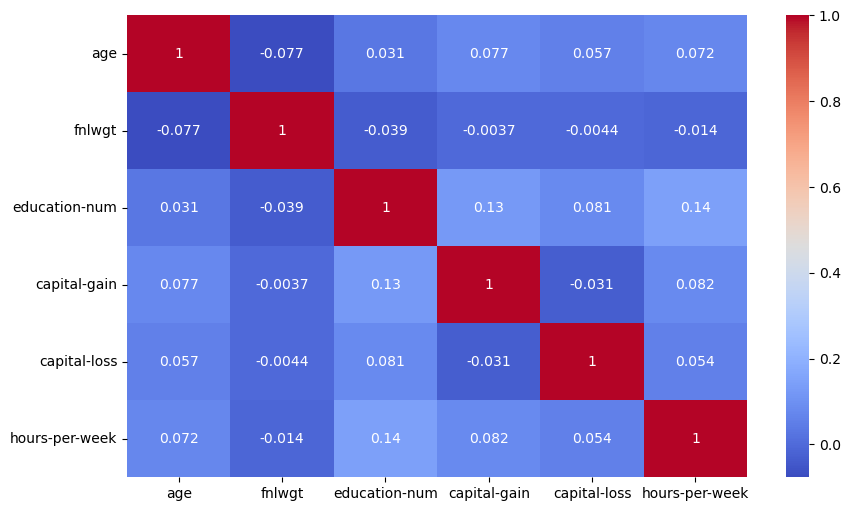

In [13]:
# View a heatmap of the correlations

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(X.corr(), cmap="coolwarm", annot=True, ax=ax)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

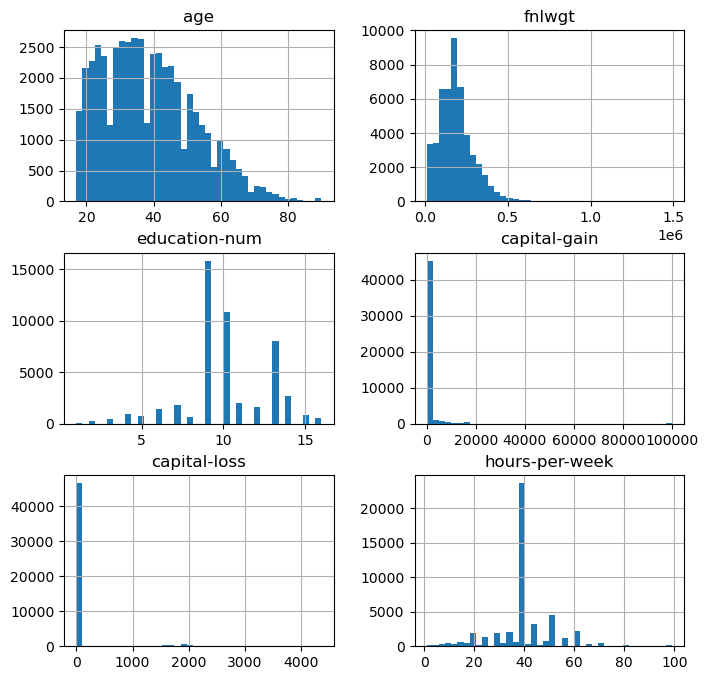

In [14]:
# View histograms of numerical features

fig, ax1 = plt.subplots(1,1, figsize=(8, 8))

X.hist(bins=40, ax=ax1)

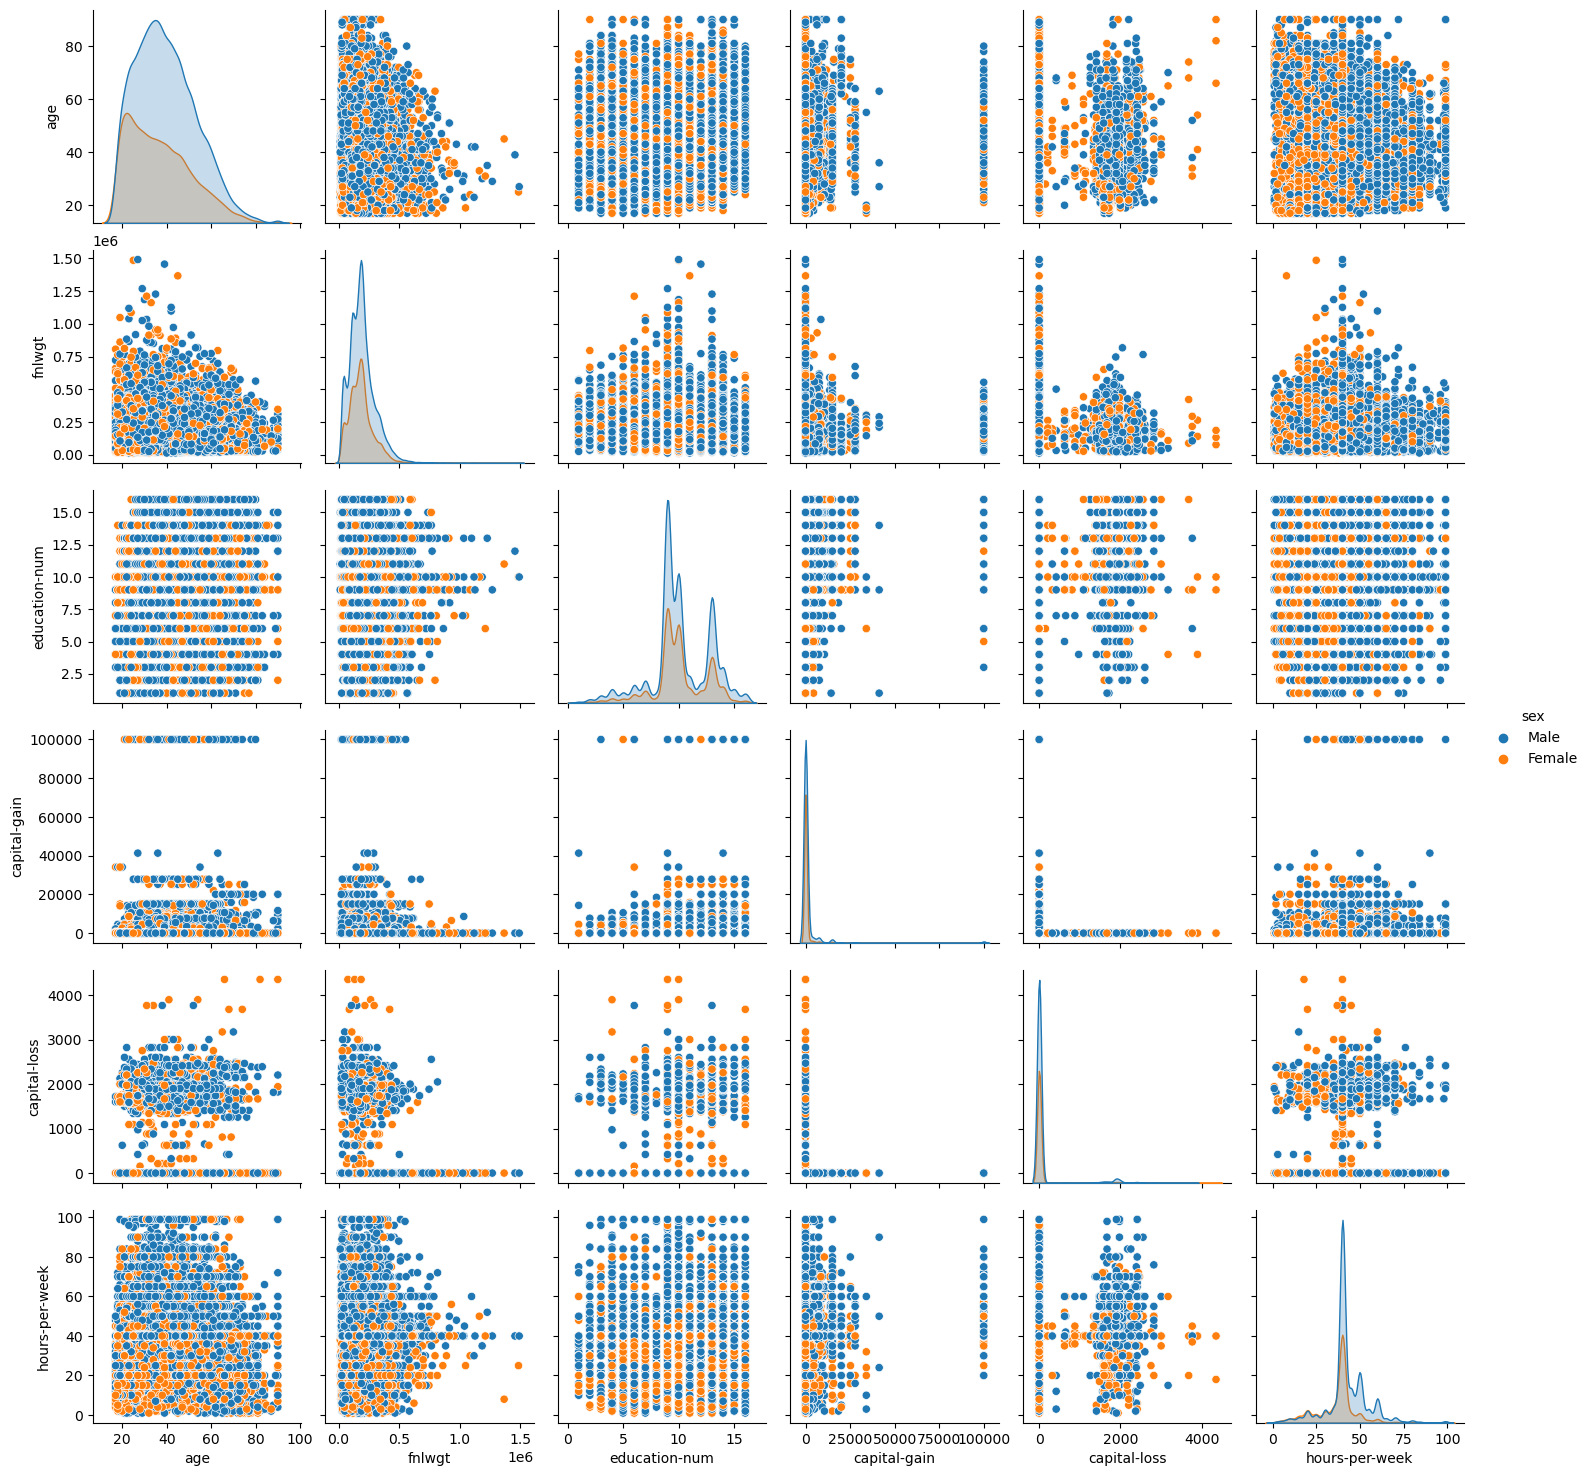

In [15]:
# I am a big fan of pairplots. They can show a lot of information relatively quickly.
# They can become cluttered with a lot of data, however, and this dataset has plenty.

# View, separating data by males/females
sns.pairplot(X, diag_kind='kde', hue='sex')

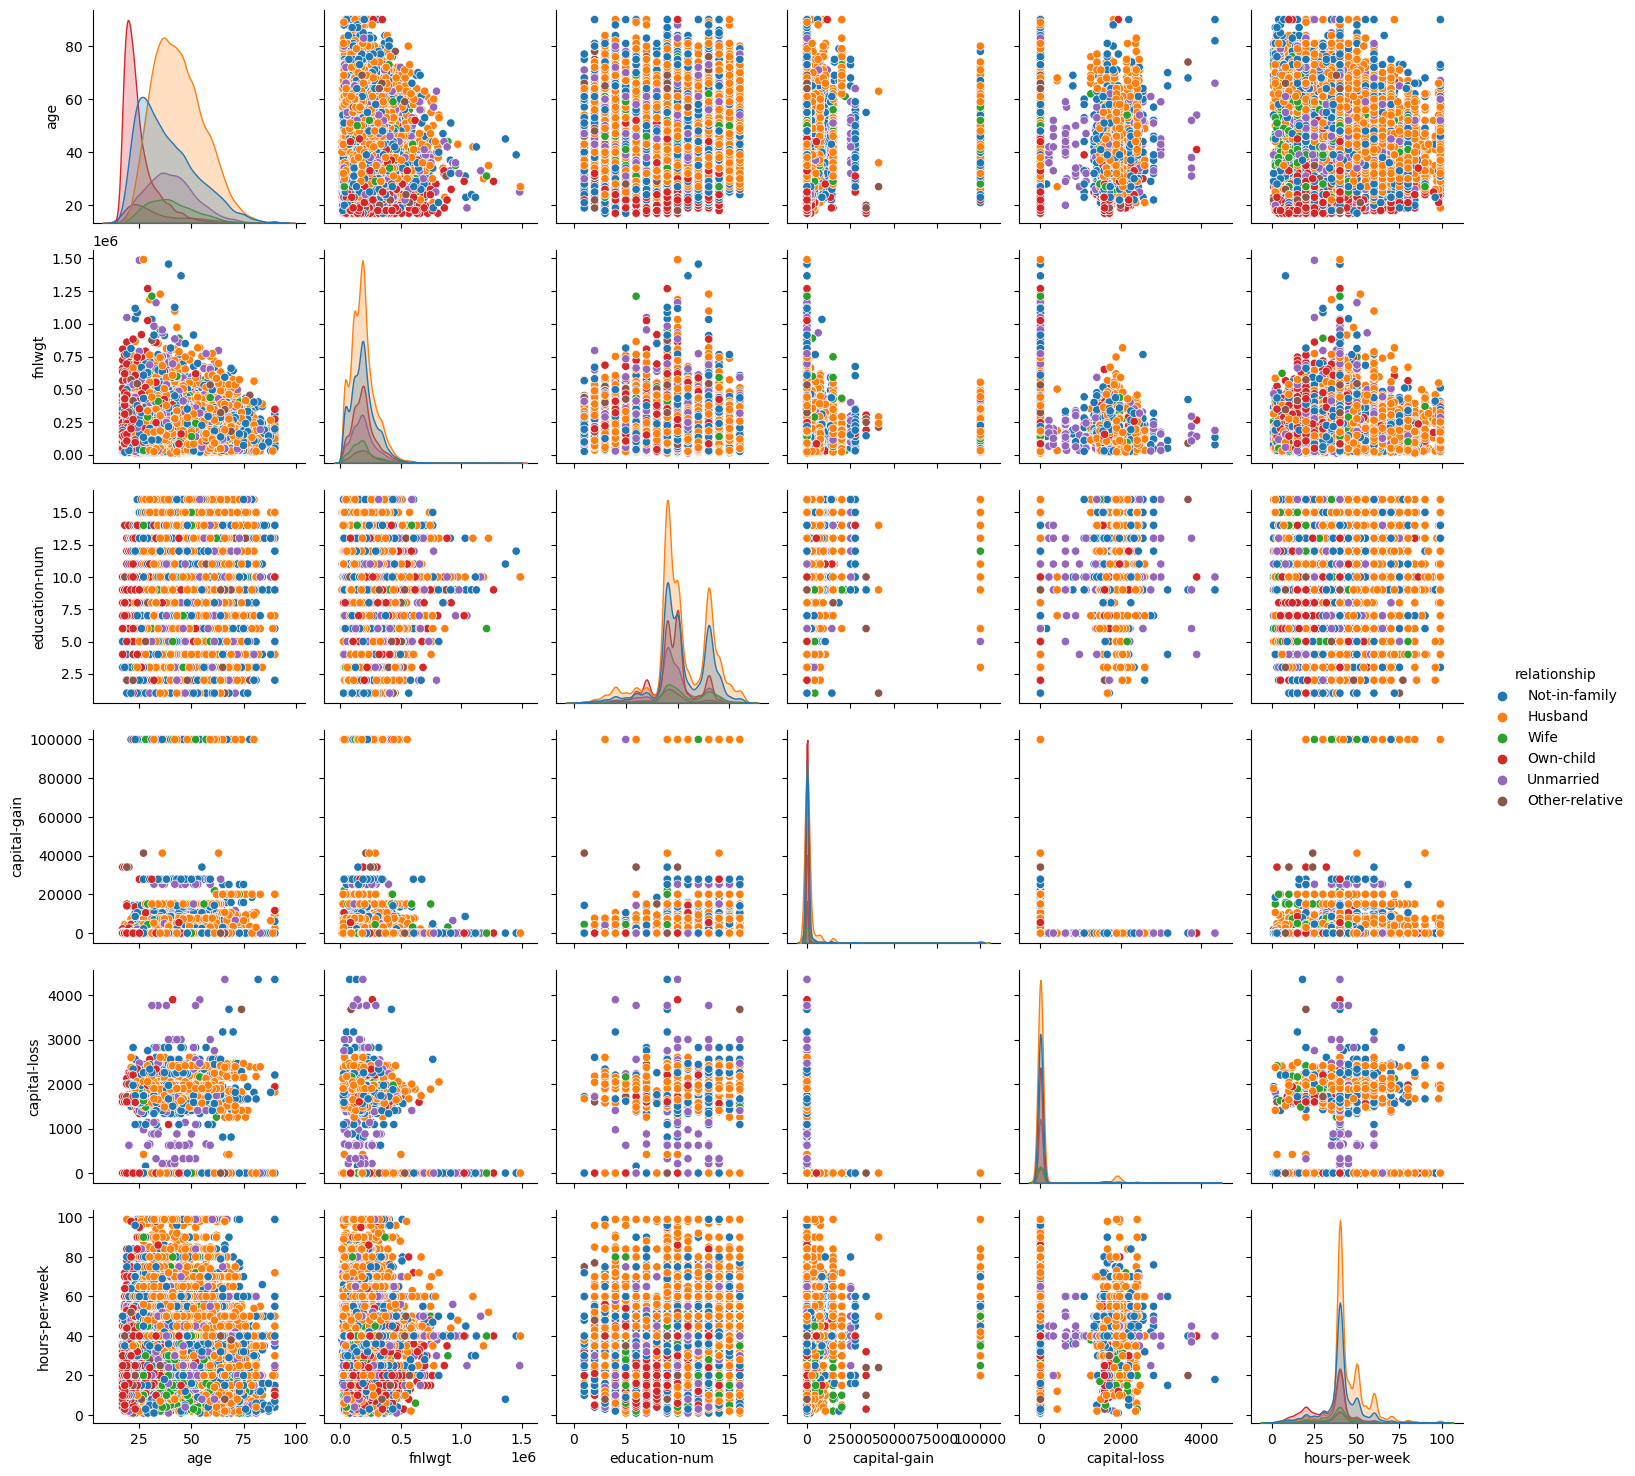

In [16]:
# View separated by relationship

sns.pairplot(X, diag_kind='kde', hue='relationship')

Notes:</br></br>
Tough to gain much from these due to the density of the data but I will point out that males/husbands have the highest tendency to work hours beyond the typical 40 hours. More hours could lead to overtime pay and greater income.

## Data Cleaning

In [17]:
# Column 'education' will not be needed as it comes ordinally encoded in the 'education-num' column

# First, preserve the education values and encoded pairings
education_index = X[['education', 'education-num']].drop_duplicates().sort_values(by='education-num').reset_index(drop=True)

# Drop
X = X.drop(columns='education')

In [18]:
# Replace '?' values with null values

for col in X[['workclass', 'occupation', 'native-country']]:
    X[col].replace('?', np.nan, inplace = True)

In [19]:
# Check the corrections

for col in X[['workclass', 'occupation', 'native-country']]:
    print(col,'\n',X[col].unique(),'\n')

workclass 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

native-country 
 ['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands'] 



In [20]:
# Look at new null totals

X.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64

In [21]:
# Check proportion of dataset that is null

(len(X) - len(X.dropna())) / len(X)

0.07411653904426518

Notes:</br></br>
Null values represent about 7.4% of the observations in the dataset. It's a good portion of the data, but not overwhelming. For my own curiosity, I want to model the data both by imputing the nulls and by dropping them to see how model performance changes.
</br></br>

In [22]:
# Create a second dataframe where nulls will be dropped

X2 = adult.data.features
X2['income'] = adult.data.targets

for col in X2[['workclass', 'occupation', 'native-country']]:
    X2[col].replace('?', np.nan, inplace = True)
    
X2 = X2.dropna()

y2 = pd.DataFrame(X2['income'])

X2 = X2.drop(columns=['income', 'education'])

print(X2.shape)
print(y2.shape)

(45222, 13)
(45222, 1)


In [23]:
# Remove the trailing periods

y['income'] = y['income'].str.rstrip('.')
y2['income'] = y2['income'].str.rstrip('.')

print(y['income'].unique())
print(y2['income'].unique())

['<=50K' '>50K']
['<=50K' '>50K']


In [24]:
# Map target values to 0 for '<=50K' and 1 for '>50K'

y['income'] = y['income'].map({'<=50K': 0, '>50K': 1})
y2['income'] = y2['income'].map({'<=50K': 0, '>50K': 1})

## Imputation
Due to values being spread among the 'occupation' variable somewhat evenly, I don't want to drop all 2809 nulls into one category. I will use KNN imputation to predict what the missing values could be, and hopefully get a more even spread among the occupation levels this way. I could not get OrdinalEncoder's inverse_transform() to work over multiple columns for me. So, I built my own function to do it using dictionaries.

In [25]:
def encode_impute_decode(df):
    
    # Instantiate empty dictionary
    categorical_label_mappings = {}
    
    # Loop through categorical levels, assigning numeric values in sub-dictionaries, ignoring nulls
    # Replaces categorical levels with associated numerics, and loops over all categorical columns
    # This achieves an Ordinal type of encoding
    for col in df.select_dtypes(include='object'):
        unique_values = df[col].unique()
        mapping = {value: index + 1 if not pd.isna(value) else value for index, value in enumerate(unique_values)}
        categorical_label_mappings[col] = mapping
        df[col] = df[col].map(mapping)
        
    df_encoded = df.copy()
    
    # Create and implement imputation on nulls
    knn_imputer = KNNImputer(n_neighbors=5)
    df_encoded_imputed = pd.DataFrame(np.round(knn_imputer.fit_transform(df_encoded)), columns=df_encoded.columns)
    
    # Revert from ordinally encoded values back to categorical levels
    # This ensures accurate one-hot encoding in later steps
    for col, mapping in categorical_label_mappings.items():
        reverse_mapping = {value: key for key, value in mapping.items()}
        df_encoded_imputed[col] = df_encoded_imputed[col].map(reverse_mapping)
    
    return df_encoded_imputed

In [26]:
# Run imputation, check output

X = encode_impute_decode(X)
X.isna().sum()

age                0
workclass          1
fnlwgt             0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country    14
dtype: int64

In [27]:
# Imperfect cleanup, run it again

X = encode_impute_decode(X)
X.isna().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

Perfect.

In [28]:
# View original occupation distribution

X_unaltered['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [29]:
# View new values

X['occupation'].value_counts()

Prof-specialty       6685
Craft-repair         6497
Exec-managerial      6140
Sales                6140
Other-service        5702
Adm-clerical         5613
Machine-op-inspct    3025
Transport-moving     2495
Handlers-cleaners    2326
Farming-fishing      1532
Tech-support         1447
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

Notes:</br></br>
Reasonable distribution acheived from the imputation.</br></br>

## Build Transformer

In [30]:
# Most of the work has been done outside of the transformer, but we can implement one for the final steps

# Retrieve variable names for numeric and categorical features separately
numeric_vars = X.select_dtypes(include=[np.number]).columns.to_list()
categorical_vars = X.select_dtypes(include='object').columns.to_list()

# Make numeric and categorical pipelines
numeric_pipe = make_pipeline(StandardScaler())
categorical_pipe = make_pipeline(OneHotEncoder(handle_unknown="ignore", sparse_output=False))

# Create transformer
preprocessing = ColumnTransformer([
    ("Numeric", numeric_pipe, numeric_vars),
    ("Categorical", categorical_pipe, categorical_vars)])

preprocessing

ColumnTransformer(transformers=[('Numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'fnlwgt', 'education-num',
                                  'capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('Categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['workclass', 'marital-status', 'occupation',
                                  'relationship', 'race', 'sex',
                                  'native-country'])])

In [31]:
# Prepare imputed dataframe

prepared = preprocessing.fit_transform(X)

# Return to dataframe
X_prepared = pd.DataFrame(prepared,
                         columns = preprocessing.get_feature_names_out(),
                         index = X.index)

X_prepared

Numeric__age  Numeric__fnlwgt  Numeric__education-num  \
0          0.025996        -1.061979                1.136512   
1          0.828308        -1.007104                1.136512   
2         -0.046942         0.246034               -0.419335   
3          1.047121         0.426663               -1.197259   
4         -0.776316         1.408530                1.136512   
...             ...              ...                     ...   
48837      0.025996         0.243884                1.136512   
48838      1.849433         1.247492               -0.419335   
48839     -0.046942         1.754865                1.136512   
48840      0.390683        -1.001612                1.136512   
48841     -0.265754        -0.071174                1.136512   

       Numeric__capital-gain  Numeric__capital-loss  Numeric__hours-per-week  \
0                   0.146932              -0.217127                -0.034087   
1                  -0.144804              -0.217127                -2.213032   
2                  -0.144804              -0.217127                -0.034087   
3                  -0.144804              -0.217127                -0.034087   
4                  -0.144804              -0.217127                -0.034087   
...                      ...                    ...                      ...   
48837              -0.144804              -0.217127                -0.356894   
48838              -0.144804              -0.217127                -0.034087   
48839              -0.144804              -0.217127                 0.772930   
48840               0.587220              -0.217127                -0.034087   
48841              -0.144804              -0.217127                 1.579946   

       Categorical__workclass_Federal-gov  Categorical__workclass_Local-gov  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   
...                                   ...                               ...   
48837                                 0.0                               0.0   
48838                                 0.0                               0.0   
48839                                 0.0                               0.0   
48840                                 0.0                               0.0   
48841                                 0.0                               0.0   

       Categorical__workclass_Never-worked  Categorical__workclass_Private  \
0                                      0.0                             0.0   
1                                      0.0                             0.0   
2                                      0.0                             1.0   
3                                      0.0                             1.0   
4                                      0.0                             1.0   
...                                    ...                             ...   
48837                                  0.0                             1.0   
48838                                  0.0                             1.0   
48839                                  0.0                             1.0   
48840                                  0.0                             1.0   
48841                                  0.0                             0.0   

       ...  Categorical__native-country_Portugal  \
0      ...                                   0.0   
1      ...                                   0.0   
2      ...                                   0.0   
3      ...                                   0.0   
4      ...                                   0.0   
...    ...                                   ...   
48837  ...                 

In [32]:
# Prepare dataframe where nulls have been dropped

prepared2 = preprocessing.fit_transform(X2)

# Return to dataframe
X2_prepared = pd.DataFrame(prepared2,
                         columns = preprocessing.get_feature_names_out(),
                         index = X2.index)

X2_prepared

Numeric__age  Numeric__fnlwgt  Numeric__education-num  \
0          0.034201        -1.062295                1.128753   
1          0.866417        -1.007438                1.128753   
2         -0.041455         0.245284               -0.438122   
3          1.093385         0.425853               -1.221559   
4         -0.798015         1.407393                1.128753   
...             ...              ...                     ...   
48836     -0.419735         0.525154                1.128753   
48837      0.034201         0.243135                1.128753   
48839     -0.041455         1.753613                1.128753   
48840      0.412481        -1.001947                1.128753   
48841     -0.268423        -0.071818                1.128753   

       Numeric__capital-gain  Numeric__capital-loss  Numeric__hours-per-week  \
0                   0.142888               -0.21878                -0.078120   
1                  -0.146733               -0.21878                -2.326738   
2                  -0.146733               -0.21878                -0.078120   
3                  -0.146733               -0.21878                -0.078120   
4                  -0.146733               -0.21878                -0.078120   
...                      ...                    ...                      ...   
48836              -0.146733               -0.21878                -0.078120   
48837              -0.146733               -0.21878                -0.411249   
48839              -0.146733               -0.21878                 0.754701   
48840               0.579985               -0.21878                -0.078120   
48841              -0.146733               -0.21878                 1.587523   

       Categorical__workclass_Federal-gov  Categorical__workclass_Local-gov  \
0                                     0.0                               0.0   
1                                     0.0                               0.0   
2                                     0.0                               0.0   
3                                     0.0                               0.0   
4                                     0.0                               0.0   
...                                   ...                               ...   
48836                                 0.0                               0.0   
48837                                 0.0                               0.0   
48839                                 0.0                               0.0   
48840                                 0.0                               0.0   
48841                                 0.0                               0.0   

       Categorical__workclass_Private  Categorical__workclass_Self-emp-inc  \
0                                 0.0                                  0.0   
1                                 0.0                                  0.0   
2                                 1.0                                  0.0   
3                                 1.0                                  0.0   
4                                 1.0                                  0.0   
...                               ...                                  ...   
48836                             1.0                                  0.0   
48837                             1.0                                  0.0   
48839                             1.0                                  0.0   
48840                             1.0                                  0.0   
48841                             0.0                                  1.0   

       ...  Categorical__native-country_Portugal  \
0      ...                                   0.0   
1      ...                                   0.0   
2      ...                                   0.0   
3      ...                                   0.0   
4      ...                                   0.0   
...    ...                                   ...   
48836  ...                 

## Train/Test Split

In [33]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_prepared, y2, test_size=.2, random_state=42)

print(X_train.shape)
print(X_train2.shape)

(39073, 89)
(36177, 88)


Notes:</br></br>
A feature was lost from the dataframe where nulls were dropped.</br></b>

## Define Helper Functions

In [34]:
# Function for plotting ROC curve

def plot_roc(y_truth, y_prob, ax):

    FPR, TPR, thresholds = roc_curve(y_truth, y_prob)

    ax.step(FPR, TPR, linewidth=2)
    ax.plot([0,1], [0,1], '--', color = 'black')

    fs = 10
    ax.set_xlabel('1 - Specifity = 1 - TNR = FPR', fontsize=fs)
    ax.set_ylabel('Sensitivity = TPR', fontsize=fs)
    ax.tick_params(axis='both', labelsize=fs)

    AUC = np.trapz(TPR, FPR)
    ax.set_title('ROC Curve, AUC = ' + str(round(AUC,4)))

In [35]:
# Function for plotting Precision-recall curve

def plot_pr(y_truth, y_prob, ax):

    precisions, recalls, thresholds = precision_recall_curve(y_truth, y_prob)

    ax.step(recalls, precisions, linewidth=2)
    ax.grid()

    fs = 10
    ax.set_xlabel('Recall (Sensitivity)', fontsize=fs)
    ax.set_ylabel('Precision (PPV)', fontsize=fs)
    ax.tick_params(axis='both', labelsize=fs)

    ax.set_title('Precision-Recall Curve')
    ax.set_ylim([0, 1])
    ax.set_xlim([0, 1])

In [36]:
# Function to train models, run predictions, output results, and call plotting functions

def model_evaluation(models, X_train, y_train, X_test, y_test):
    
    y_test_enc = LabelEncoder().fit_transform(y_test)
    
    for model in models:
        
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        probs = model.predict_proba(X_test)
        
        cm = confusion_matrix(y_test_enc, preds)
        acc = accuracy_score(y_test_enc, preds)
        prec = precision_score(y_test_enc, preds)
        rec = recall_score(y_test_enc, preds)
        
        print('*************************************************************************************************************************\n')
        print('Model:',model,'\n')
        print(f'Accuracy: {acc:.6f}; Precision: {prec:.6f}; Recall: {rec:.6f}\n')
        print('Confusion Matrix:\n',cm,'\n')
        
        fig1, ax1 = plt.subplots(1, 2, figsize=(11,5))
        
        plot_roc(y_test_enc, probs[:,1], ax1[0])
        plot_pr(y_test_enc, probs[:,1], ax1[1])
        plt.show()
    
    print('*************************************************************************************************************************\n')

## Modeling

In [37]:
# Create several different models to evaluate their performance

lr = LogisticRegression(random_state=42)
svc = SVC(kernel='linear', C=0.1, probability=True, random_state=42)
svc2 = SVC(kernel='poly', degree=3, coef0=1, C=0.1, probability=True, random_state=42)
rf = RandomForestClassifier(random_state=42)

#models = [lr, rf] # For faster modeling; SVC models take considerable time
models = [lr, svc, svc2, rf]

*************************************************************************************************************************

Model: LogisticRegression(random_state=42) 

Accuracy: 0.850855; Precision: 0.739850; Recall: 0.588110

Confusion Matrix:
 [[6927  487]
 [ 970 1385]] 



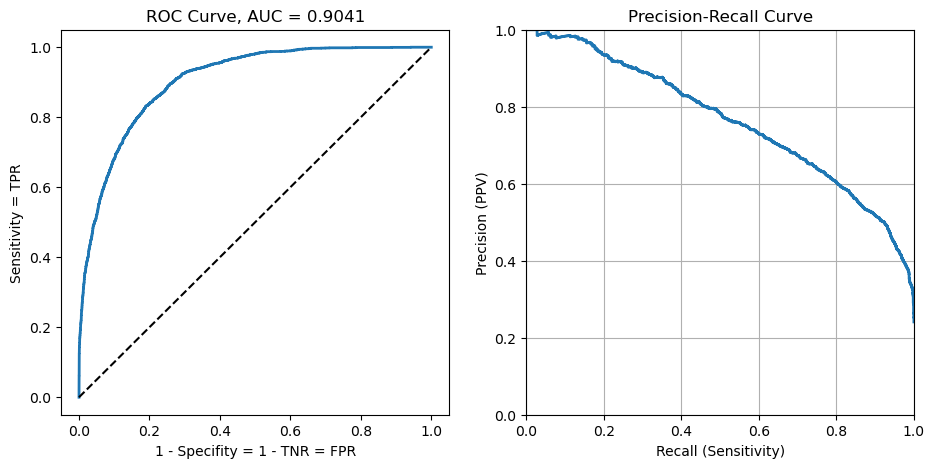

*************************************************************************************************************************

Model: SVC(C=0.1, kernel='linear', probability=True, random_state=42) 

Accuracy: 0.849729; Precision: 0.744353; Recall: 0.573673

Confusion Matrix:
 [[6950  464]
 [1004 1351]] 



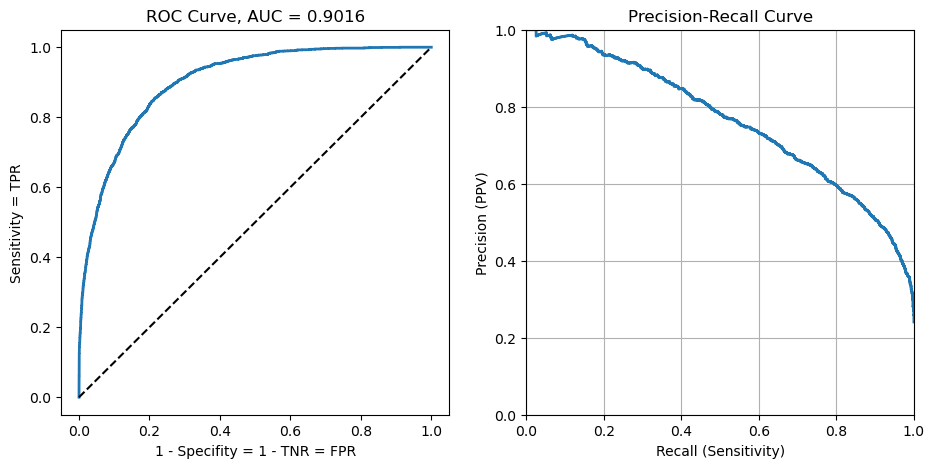

*************************************************************************************************************************

Model: SVC(C=0.1, coef0=1, kernel='poly', probability=True, random_state=42) 

Accuracy: 0.853516; Precision: 0.767361; Recall: 0.563057

Confusion Matrix:
 [[7012  402]
 [1029 1326]] 



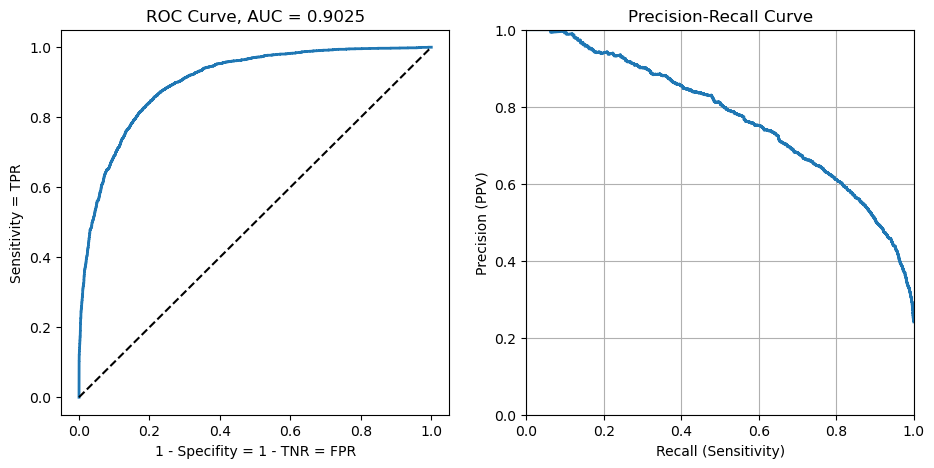

*************************************************************************************************************************

Model: RandomForestClassifier(random_state=42) 

Accuracy: 0.853823; Precision: 0.741532; Recall: 0.604246

Confusion Matrix:
 [[6918  496]
 [ 932 1423]] 



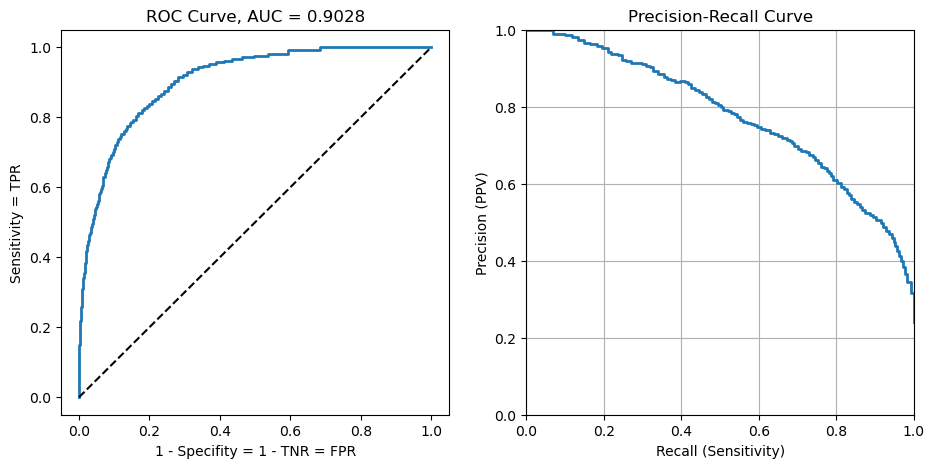

*************************************************************************************************************************



In [38]:
# Imputed dataframe modeling

model_evaluation(models, X_train, y_train, X_test, y_test)

*************************************************************************************************************************

Model: LogisticRegression(random_state=42) 

Accuracy: 0.852405; Precision: 0.763517; Recall: 0.607826

Confusion Matrix:
 [[6312  433]
 [ 902 1398]] 



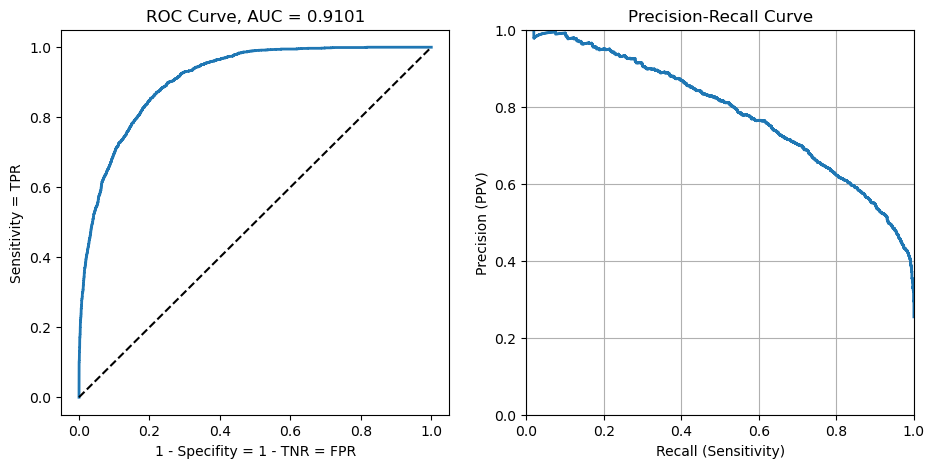

*************************************************************************************************************************

Model: SVC(C=0.1, kernel='linear', probability=True, random_state=42) 

Accuracy: 0.851962; Precision: 0.768586; Recall: 0.597826

Confusion Matrix:
 [[6331  414]
 [ 925 1375]] 



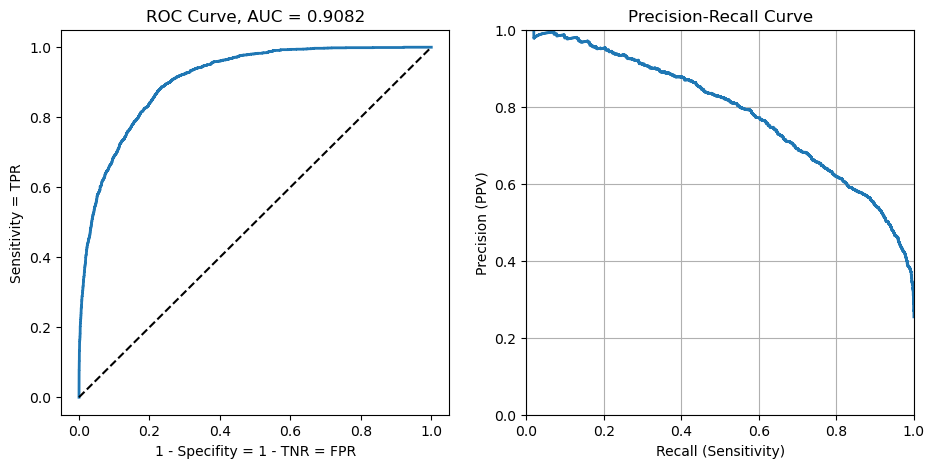

*************************************************************************************************************************

Model: SVC(C=0.1, coef0=1, kernel='poly', probability=True, random_state=42) 

Accuracy: 0.855832; Precision: 0.786536; Recall: 0.594348

Confusion Matrix:
 [[6374  371]
 [ 933 1367]] 



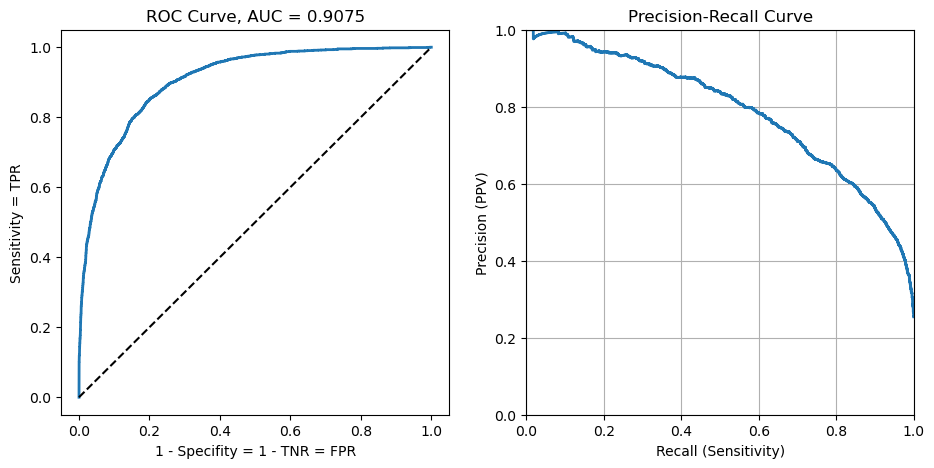

*************************************************************************************************************************

Model: RandomForestClassifier(random_state=42) 

Accuracy: 0.855169; Precision: 0.757544; Recall: 0.633043

Confusion Matrix:
 [[6279  466]
 [ 844 1456]] 



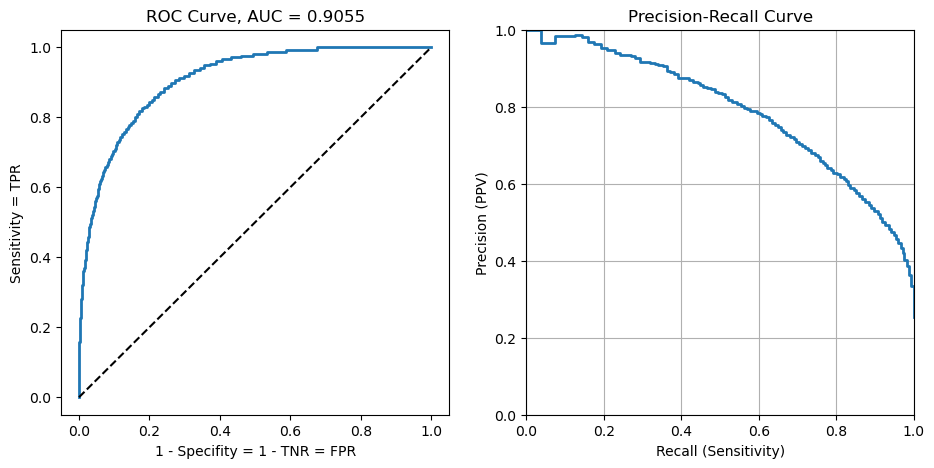

*************************************************************************************************************************



In [39]:
# Dropped nulls dataframe modeling

model_evaluation(models, X_train2, y_train2, X_test2, y_test2)

Notes:</br></br>
Models all performed very similarly. The dataframe where nulls were dropped did slightly better than the imputed values, so that dataframe will be used going forward and only the Logistic Regression and Random Forest models will be used to save on training time.</br></br>
Next, a closer look at the Random Forest model.</br></br>

In [40]:
# Check to see which features are impacting the model the most
# The most recent run of the model will be called, meaning X2 (dropped nulls)

rf.feature_importances_

array([1.54486521e-01, 1.74469322e-01, 1.08180386e-01, 1.01734078e-01,
       3.26784734e-02, 8.19714228e-02, 4.67523651e-03, 4.91012294e-03,
       9.03304965e-03, 6.02852657e-03, 7.74550737e-03, 4.02838718e-03,
       1.20135385e-04, 6.03826214e-03, 3.35410358e-04, 6.40090117e-02,
       7.84046772e-04, 2.73540087e-02, 1.44765362e-03, 1.66898491e-03,
       4.93099860e-03, 3.91338219e-05, 6.30662548e-03, 1.75337536e-02,
       4.74638968e-03, 3.22277766e-03, 4.10870775e-03, 6.96685550e-03,
       1.45148745e-04, 1.51010537e-02, 2.55788683e-03, 6.22209561e-03,
       3.99289999e-03, 4.16312438e-03, 3.95922780e-02, 1.15707145e-02,
       1.58586067e-03, 7.92389248e-03, 4.95502177e-03, 9.45099009e-03,
       1.11506249e-03, 2.67268624e-03, 4.29179022e-03, 7.86012683e-04,
       5.33919730e-03, 7.43601401e-03, 9.53818106e-03, 2.56071379e-04,
       1.28098658e-03, 5.31523324e-04, 1.68910133e-04, 7.01698187e-04,
       2.76685002e-04, 1.75189616e-04, 2.43275539e-04, 8.27288491e-04,
      

<Axes: >

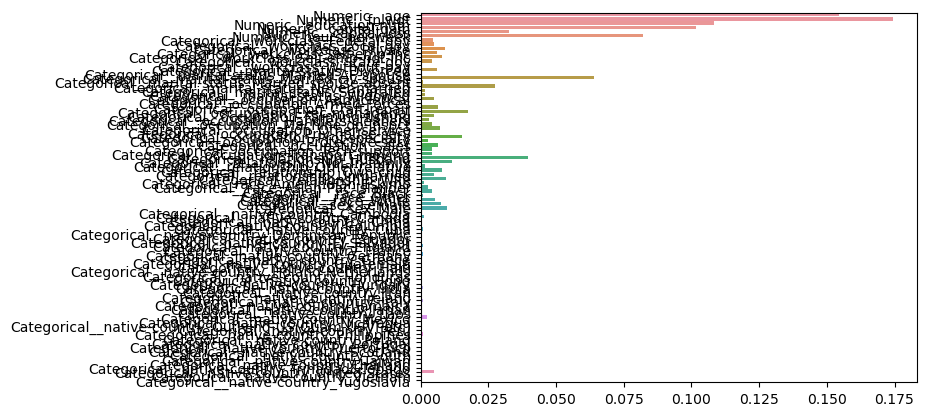

In [41]:
# Visualize

sns.barplot(x=rf.feature_importances_, y=X_train2.columns)

Notes:</br></br>
Despite the labels being unclear, the plot shows that very few of the features are meaningfully adding to the model. To reduce the feature space, only those contributing above an arbitrary threshold will be used to attempt further model improvement.</br></br>

In [42]:
# Choose a threshold between the first two x-ticks, select all features above the threshold
threshold = 0.01

# Create a boolean mask of features that meet the threshold
selected_features = np.array(rf.feature_importances_ > threshold)

# Use the mask to filter the feature names
selected_feature_names = np.array(rf.feature_names_in_)[selected_features].tolist()

selected_feature_names

['Numeric__age',
 'Numeric__fnlwgt',
 'Numeric__education-num',
 'Numeric__capital-gain',
 'Numeric__capital-loss',
 'Numeric__hours-per-week',
 'Categorical__marital-status_Married-civ-spouse',
 'Categorical__marital-status_Never-married',
 'Categorical__occupation_Exec-managerial',
 'Categorical__occupation_Prof-specialty',
 'Categorical__relationship_Husband',
 'Categorical__relationship_Not-in-family']

Notes:</br></br>
There are now only 12 features. Time to re-model and evaluate.</br></br>

*************************************************************************************************************************

Model: LogisticRegression(random_state=42) 

Accuracy: 0.844223; Precision: 0.750140; Recall: 0.580870

Confusion Matrix:
 [[6300  445]
 [ 964 1336]] 



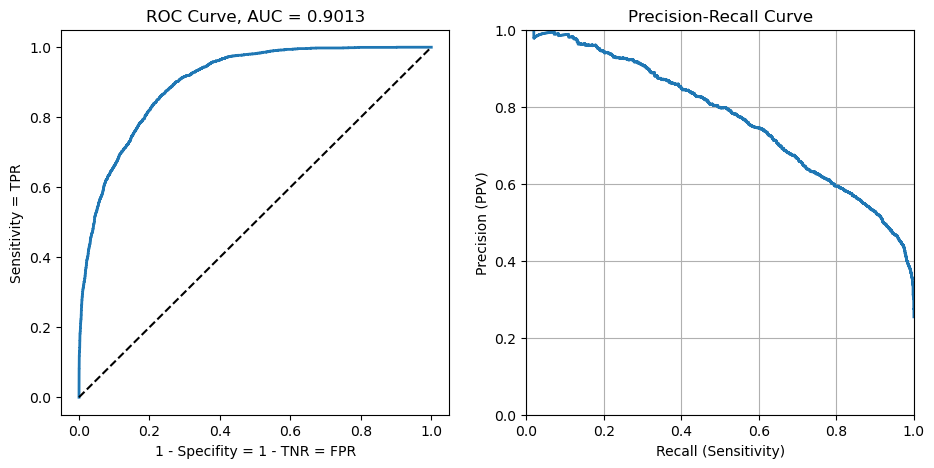

*************************************************************************************************************************

Model: RandomForestClassifier(random_state=42) 

Accuracy: 0.843007; Precision: 0.719124; Recall: 0.627826

Confusion Matrix:
 [[6181  564]
 [ 856 1444]] 



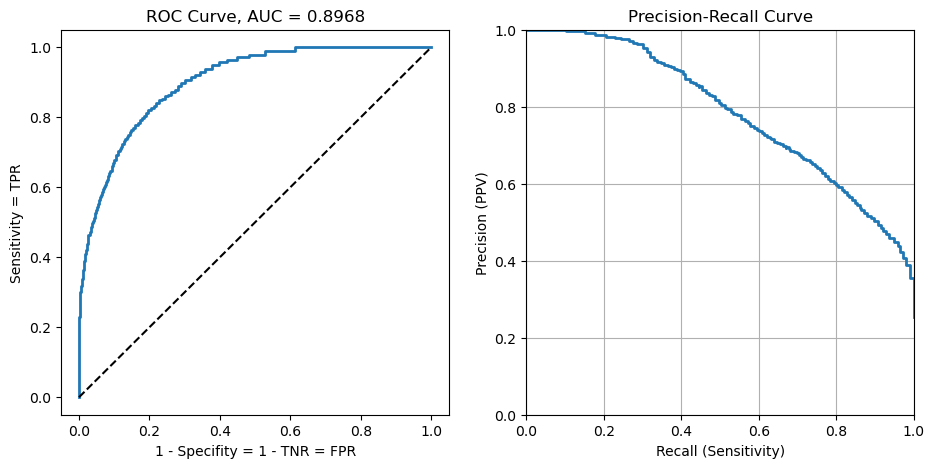

*************************************************************************************************************************



In [43]:
# Run lr and rf models on reduced feature space

models = [lr, rf] # Comment this line to include SVC models also

model_evaluation(models, X_train2[selected_feature_names], y_train2, X_test2[selected_feature_names], y_test2)

Notes:</br></br>
Unfortunately, reducing the feature space did not improve the models. They performed slightly worse.</br></br>
Next, tuning and cross validation to attempt improving model performance.</br></br>

## Tuning and Cross-Validation

In [44]:
# Run a grid search on the logistic regression model to determine best parameters

# Parameters to check for optimal performance
params_lr = {'penalty' : ['l1', 'l2', 'elasticnet', None], 'C' : [.001, .01, .1, 1, 10],
            'class_weight' : ['balanced', None]}

# Run grid search with 5 folds
grid_search_lr = GridSearchCV(lr, params_lr, cv=5)
grid_search_lr.fit(X_train2, y_train2)

# View best parameters
print(grid_search_lr.best_params_)
print(grid_search_lr.best_score_)

{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}
0.8473339438108543


In [45]:
# Run a grid search on the random forest model to determine best parameters

# Parameters to check for optimal performance
params_rf = {'n_estimators' : [10, 25, 50, 100], 'criterion' : ['gini', 'entropy', 'log_loss'],
             'max_depth' : [2, 4, 6, 8, 10, None], 'max_features' : ['sqrt', 'log2', None]}

# Run grid search with 5 folds
grid_search_rf = GridSearchCV(rf, params_rf, cv=5)
grid_search_rf.fit(X_train2, y_train2)

# View best parameters
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'n_estimators': 50}
0.8578654565611625


*************************************************************************************************************************

Model: LogisticRegression(C=0.1, random_state=42) 

Accuracy: 0.852515; Precision: 0.765093; Recall: 0.606087

Confusion Matrix:
 [[6317  428]
 [ 906 1394]] 



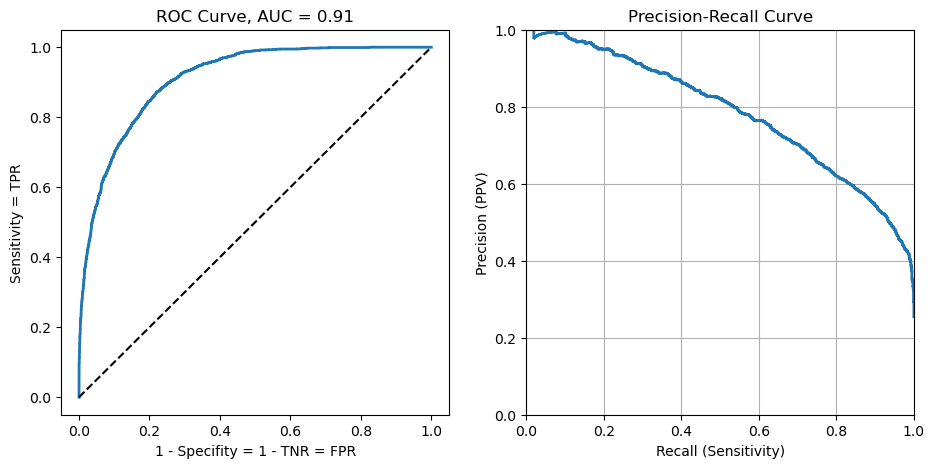

*************************************************************************************************************************

Model: RandomForestClassifier(max_depth=10, max_features=None, n_estimators=50,
                       random_state=42) 

Accuracy: 0.862023; Precision: 0.808324; Recall: 0.599565

Confusion Matrix:
 [[6418  327]
 [ 921 1379]] 



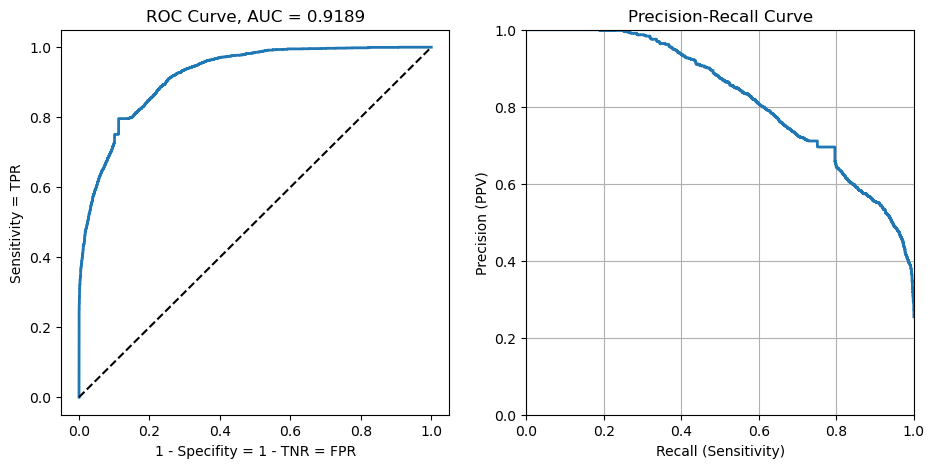

*************************************************************************************************************************



In [46]:
# Create new models using ideal parameters then run and re-evaluate

lr2 = LogisticRegression(penalty='l2', class_weight=None, C=0.1, random_state=42)
rf2 = RandomForestClassifier(criterion='gini', max_depth=10, max_features=None, n_estimators=50, random_state=42)

models2 = [lr2, rf2]

# Run models on the full feature space using X2 dataframe
model_evaluation(models2, X_train2, y_train2, X_test2, y_test2)

*************************************************************************************************************************

Model: LogisticRegression(C=0.1, random_state=42) 

Accuracy: 0.843781; Precision: 0.749859; Recall: 0.578696

Confusion Matrix:
 [[6301  444]
 [ 969 1331]] 



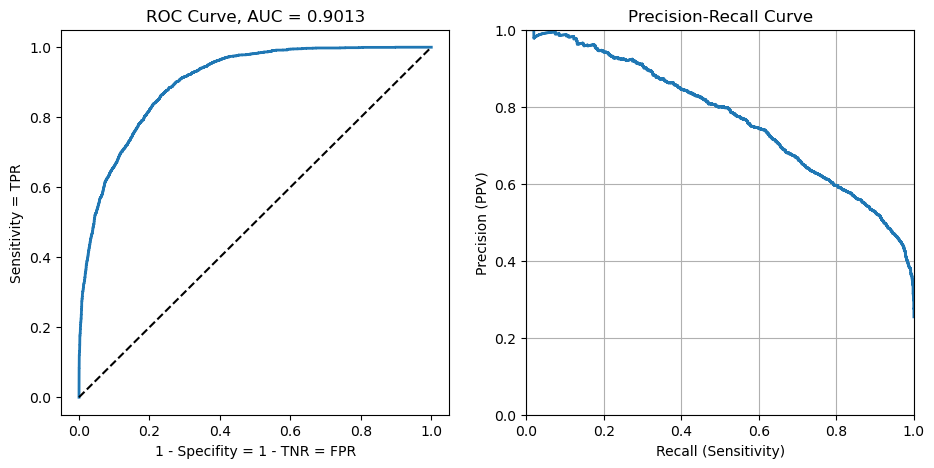

*************************************************************************************************************************

Model: RandomForestClassifier(max_depth=10, max_features=None, n_estimators=50,
                       random_state=42) 

Accuracy: 0.860033; Precision: 0.800232; Recall: 0.599130

Confusion Matrix:
 [[6401  344]
 [ 922 1378]] 



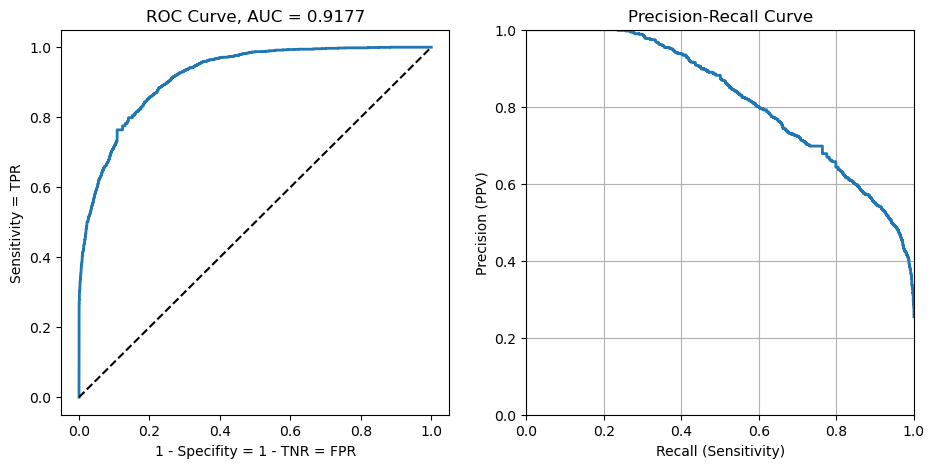

*************************************************************************************************************************



In [47]:
# Run models on the reduced feature space using X2 dataframe to see if performance remains lower

model_evaluation(models2, X_train2[selected_feature_names], y_train2, X_test2[selected_feature_names], y_test2)

The reduced feature space still performs worse with tuned models.

## Conclusions
The no-information rate for this dataset is 76.07%. Considering this, the models did reasonably better than chance with the final Random Forest model acheiving 86.00% accuracy and the Logistic Regression model just behind at 84.38%.</br></br>
The best model in this case is the Random Forest Classifier. The AUC of almost 0.92 means the model does a fairly good job of separating the data into the two target categories. On the other hand, the precision-recall curve shows that there isn't necessarily an optimal tradeoff between Positive Predictive Value (PPV) and True Positive Rate (TPR). The decline is nearly one-for-one instead of having a somewhat balanced dropoff point.</br></br>
With further feature engineering and model evaluation, I believe performance could be improved. As they are now, selecting the Random Forest model to make predictions would offer insight well beyond chance and could be useful to any number of given situations.

## References
Becker, Barry and Kohavi, Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.